
# Project: European Soccer Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this Project I'm going to analyze Soccer Database from 2008 to 2016.I have downloaded the data using SQlite and converted it to csv using DB browser. I'm working on Player and Player Attributes data. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [6]:
df_p=pd.read_csv('Player.csv')
df_p2=pd.read_csv('Player_Attributes.csv')

In [7]:
df_p.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
#explore each datafarme
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [9]:
df_p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [10]:
# check for duplicated rows in each dataframe
sum(df_p.duplicated())

0

In [11]:
sum(df_p2.duplicated())

0

In [12]:
#check for missing values 
df_p.columns[df_p.isnull().any()]

Index([], dtype='object')

In [13]:
df_p2.columns[df_p2.isnull().any()]

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [14]:
df_p.nunique()

id                    11060
player_api_id         11060
player_name           10848
player_fifa_api_id    11060
birthday               5762
height                   20
weight                   50
dtype: int64

In [15]:
df_p2.nunique()

id                     183978
player_fifa_api_id      11062
player_api_id           11060
date                      197
overall_rating             61
potential                  56
preferred_foot              2
attacking_work_rate         8
defensive_work_rate        19
crossing                   95
finishing                  97
heading_accuracy           96
short_passing              95
volleys                    93
dribbling                  97
curve                      92
free_kick_accuracy         97
long_passing               95
ball_control               93
acceleration               86
sprint_speed               85
agility                    81
reactions                  78
balance                    81
shot_power                 96
jumping                    79
stamina                    84
strength                   82
long_shots                 96
aggression                 91
interceptions              96
positioning                95
vision                     97
penalties 

### Data Cleaning 

In [16]:
#Make copies of dataframes
df_p_clean=df_p.copy()
df_p2_clean=df_p2.copy()

### Merge both Dataframes in one Dataframe


In [17]:
#merging Player and Player Attributes in one Dataframe 'Players'
players=pd.merge(df_p,df_p2,how='outer',on='id')
players

,id,player_api_id_x,player_name,player_fifa_api_id_x,birthday,height,weight,player_fifa_api_id_y,player_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942.0,Aaron Appindangoye,218353.0,1992-02-29 00:00:00,182.88,187.0,218353,505942,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,155782.0,Aaron Cresswell,189615.0,1989-12-15 00:00:00,170.18,146.0,218353,505942,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,162549.0,Aaron Doran,186170.0,1991-05-13 00:00:00,170.18,163.0,218353,505942,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,30572.0,Aaron Galindo,140161.0,1982-05-08 00:00:00,182.88,198.0,218353,505942,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,23780.0,Aaron Hughes,17725.0,1979-11-08 00:00:00,182.88,154.0,218353,505942,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,NaN,NaN,NaN,NaN,NaN,NaN,102359,39902,2009-08-30 00:00:00,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,NaN,NaN,NaN,NaN,NaN,NaN,102359,39902,2009-02-22 00:00:00,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,NaN,NaN,NaN,NaN,NaN,NaN,102359,39902,2008-08-30 00:00:00,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,NaN,NaN,NaN,NaN,NaN,NaN,102359,39902,2007-08-30 00:00:00,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


### Drop and Rename some columns

In [18]:
players.drop(['player_api_id_x','player_fifa_api_id_x','player_fifa_api_id_y'],axis=1,inplace=True)
players.head()

,id,player_name,birthday,height,weight,player_api_id_y,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187.0,505942,2016-02-18 00:00:00,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146.0,505942,2015-11-19 00:00:00,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,Aaron Doran,1991-05-13 00:00:00,170.18,163.0,505942,2015-09-21 00:00:00,62.0,66.0,right,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,Aaron Galindo,1982-05-08 00:00:00,182.88,198.0,505942,2015-03-20 00:00:00,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,Aaron Hughes,1979-11-08 00:00:00,182.88,154.0,505942,2007-02-22 00:00:00,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [19]:
players.rename(columns={'player_api_id_y':'player_api_id'},inplace=True)

In [20]:
players.columns

Index(['id', 'player_name', 'birthday', 'height', 'weight', 'player_api_id',
       'date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

### Dealing with NaN Values

In [21]:
players.dropna(inplace=True)

In [22]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10876 entries, 0 to 11059
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10876 non-null  int64  
 1   player_name          10876 non-null  object 
 2   birthday             10876 non-null  object 
 3   height               10876 non-null  float64
 4   weight               10876 non-null  float64
 5   player_api_id        10876 non-null  int64  
 6   date                 10876 non-null  object 
 7   overall_rating       10876 non-null  float64
 8   potential            10876 non-null  float64
 9   preferred_foot       10876 non-null  object 
 10  attacking_work_rate  10876 non-null  object 
 11  defensive_work_rate  10876 non-null  object 
 12  crossing             10876 non-null  float64
 13  finishing            10876 non-null  float64
 14  heading_accuracy     10876 non-null  float64
 15  short_passing        10876 non-null 

### Change Data type 


In [23]:
# Convert birthday from object to datetime
pd.to_datetime(players['birthday']) 

0       1992-02-29
1       1989-12-15
2       1991-05-13
3       1982-05-08
4       1979-11-08
           ...    
11055   1979-04-03
11056   1986-12-18
11057   1979-04-29
11058   1981-10-06
11059   1982-06-05
Name: birthday, Length: 10876, dtype: datetime64[ns]

In [24]:
#convert date from object to datetime
pd.to_datetime(players['date'])

0       2016-02-18
1       2015-11-19
2       2015-09-21
3       2015-03-20
4       2007-02-22
           ...    
11055   2007-02-22
11056   2012-02-22
11057   2011-08-30
11058   2011-02-22
11059   2010-08-30
Name: date, Length: 10876, dtype: datetime64[ns]

### Save the new Dataframe

In [25]:
players.to_csv('players.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis



## who is the Fastest Player ?

In [31]:
#Average Sprint Speed
players['sprint_speed'].mean()


68.92138653916881

In [33]:
fast=players.query('sprint_speed>sprint_speed.mean()')
fast['sprint_speed'].count()

6233

In [34]:
#The Fastest Player
fast.max()

id                                       11048
player_name            dos Santos Fabio Junior
birthday                   1999-04-24 00:00:00
height                                  208.28
weight                                     243
player_api_id                           715642
date                       2016-07-07 00:00:00
overall_rating                              91
potential                                   93
preferred_foot                           right
attacking_work_rate                     medium
defensive_work_rate                          o
crossing                                    92
finishing                                   93
heading_accuracy                            93
short_passing                               92
volleys                                     87
dribbling                                   94
curve                                       88
free_kick_accuracy                          96
long_passing                                87
ball_control 

  This analysis shows that the Fastest Player is dos Santos Fabio Junior with Sprint Speed 95

## Who is The oldest and youngest players?

In [40]:
players.groupby(['birthday'])['player_name'].max()

birthday
1967-01-23 00:00:00         Alberto Fontana
1968-06-26 00:00:00           Paolo Maldini
1969-01-15 00:00:00            Rob van Dijk
1969-03-13 00:00:00              Luca Bucci
1969-04-01 00:00:00            Dean Windass
                               ...         
1998-12-16 00:00:00            Reece Oxford
1998-12-20 00:00:00    Kylian Mbappe Lottin
1999-01-23 00:00:00            Alban Lafont
1999-02-25 00:00:00    Gianluigi Donnarumma
1999-04-24 00:00:00           Jonathan Leko
Name: player_name, Length: 5714, dtype: object

 By analyzing both birthday column and player name column I discoverd that the odlest player is Alberto Fontana and the youngest Player is Jonathan Leko

## does players play with right foot are better finishers than players play with left foot ?

Text(0, 0.5, 'Finishing')

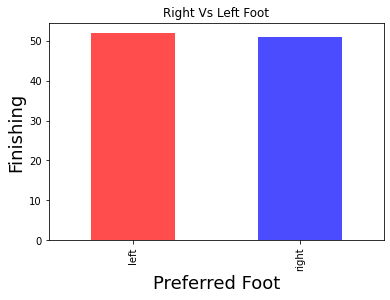

In [48]:
pref_foot=players.groupby(['preferred_foot'])['finishing'].mean()
colors=['red','blue']
pref_foot.plot(kind='bar',title='Right Vs Left Foot',color=colors,alpha=.7)
plt.xlabel('Preferred Foot' ,fontsize=18)
plt.ylabel('Finishing' ,fontsize=18)

 The Chart shows to us that  in our dataset the average of finishing ability for left footed players is greater that for right footed players which gives us an indication that left footed players are better finishers 

## Impact of some Attributes on Overall Rating

Text(0.5, 1.0, 'Relation between Overall rating and dribbling')

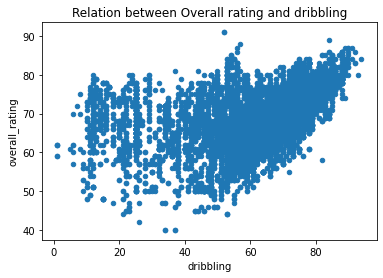

In [35]:
# Relation between Overall rating and dribbling
players.plot(x='dribbling',y='overall_rating',kind='scatter')
plt.title('Relation between Overall rating and dribbling')

 we have positive correlation between dribbling and overall rating which gives and indication that good dribblers got higher overall rating 

## Relation between Height and Jumping 

Text(0.5, 1.0, 'Relation between Height and Jumping')

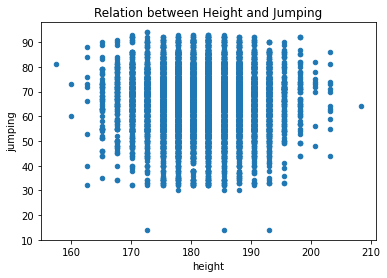

In [34]:
players.plot(x='height',y='jumping',kind='scatter')
plt.title('Relation between Height and Jumping')

 It appears that being tall or short does not affect your abillity of jumping as there is no positive or negative correlation between height and jumping

## Exploring some Important Features

In [26]:
# Overall Rating
players['overall_rating'].describe()

count    10876.000000
mean        68.571993
std          7.086582
min         40.000000
25%         64.000000
50%         69.000000
75%         74.000000
max         91.000000
Name: overall_rating, dtype: float64

,overall_rating
count,10876.000000
mean,68.571993
std,7.086582
min,40.000000
25%,64.000000
50%,69.000000
75%,74.000000
max,91.000000


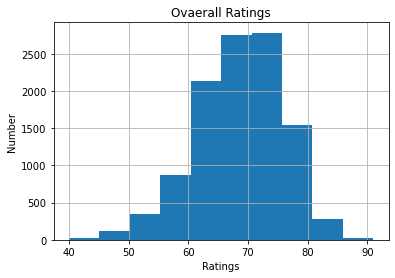

In [27]:
rating=players['overall_rating'].hist()
rating.set_ylabel('Number')
rating.set_xlabel('Ratings')
rating.set_title('Ovaerall Ratings')
pd.DataFrame(players['overall_rating'].describe())

 From a sample of 10876 player the min rating for a player is 40 and the max is 91.
 and the majority got 74 and 50% of our sample got 69 overall rating

In [28]:
# Explore Ball Control
players['ball_control'].describe()

count    10876.000000
mean        64.557282
std         14.915145
min         10.000000
25%         59.000000
50%         68.000000
75%         74.000000
max         94.000000
Name: ball_control, dtype: float64

In [29]:
players['ball_control'].value_counts()

74.0    475
73.0    444
72.0    419
68.0    412
71.0    399
       ... 
18.0      6
94.0      6
91.0      2
92.0      1
90.0      1
Name: ball_control, Length: 84, dtype: int64

In [30]:
players.groupby(['ball_control'])['player_name'].max()

ball_control
10.0           Johan Audel
11.0      Marcus Hahnemann
12.0    Zvjezdan Misimovic
13.0         Pedro Ramirez
14.0       Patrick Roberts
               ...        
89.0         Vadim Demidov
90.0     Lorenzo Melgarejo
91.0         Lorenzo Lollo
92.0         Emanuel Sarki
94.0       Lorenzo Tonelli
Name: player_name, Length: 84, dtype: object

here's the statistical describtion of Ball control abillity for the players and shows the distribution of ratings and the worst ball controler 'Johan Audel' and the best ball controler 'Lorenzo Tonelli'

,shot_power
count,10876.000000
mean,62.371000
std,15.745972
min,11.000000
25%,55.000000
50%,66.000000
75%,74.000000
max,96.000000


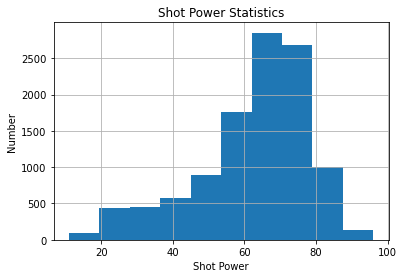

In [32]:
# explore shot Power
shot=players['shot_power'].hist()
shot.set_ylabel('Number')
shot.set_xlabel('Shot Power')
shot.set_title('Shot Power Statistics')
pd.DataFrame(players['shot_power'].describe())

players who got shot power rating between 65 and 70 are the most then those who got from 75 and 80 and the max shot power rating is 96 and the min is 11

In [33]:
players.groupby(['shot_power'])['player_name'].max()

shot_power
11.0            Mathieu Beda
12.0    Pelle van Amersfoort
13.0           Pedro Ramirez
14.0             Yann Sommer
15.0          Swen Koenig,24
                ...         
90.0       Sebastien Corchia
91.0             Nuno Campos
93.0          Faycal Rherras
94.0           Fazli Kocabas
96.0               Fede Vico
Name: player_name, Length: 84, dtype: object

Max shot power rating goes for 'Fede Vico' and weakest shot power goes for 'Mathieu Beda'

## Limitations 

I faced some challenges dealing with NaN values, useless columns and merging both dataframes in one dataframe.
The good thing was that the sample (10876 player) is big which gave me the oppurtiunity to explore it well and find reasonable answers 

<a id='conclusions'></a>
## Conclusions
After analyzing this dataset I discoverd that Fabio junior is tha fastest player in my dataset,also I knew that The odlest player is Alberto Fontana and The youngest Player is Jonathan Leko.
the impact of player attributes like dribbling on the overall rating, and that it that your tall doesn't affect on your jumping ability.I discoverd the disribution of some importat features such as shot power,overall rating and ball control
